In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install dython
from dython import nominal

In [2]:
#read dataset
#https://www.kaggle.com/turkibintalib/saudi-arabia-used-cars-dataset/version/3?select=UsedCarsSA_Unclean_EN.csv
df = pd.read_csv("UsedCarsSA_Unclean_EN.csv")
df

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


Dataset Exploration

In [3]:
df.head(10)

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
5,https://syarah.com/%D9%87%D9%88%D9%86%D8%AF%D8...,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,Used,39000,Riyadh,72000,False
6,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,Used,183000,Riyadh,92000,False
7,https://syarah.com/%D8%AC%D9%8A_%D8%A5%D9%85_%...,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,Used,323000,Riyadh,Negotiable,True
8,https://syarah.com/%D8%B4%D9%81%D8%B1%D9%88%D9...,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,Used,70000,Riyadh,80000,False
9,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,Used,131000,Jeddah,32000,False


In [4]:
df.describe()

,Year,Engine_Size,Mileage
count,8248.000000,5982.000000,8.248000e+03
mean,2014.014064,3.175794,1.494128e+05
std,5.935349,1.567480,3.455258e+05
min,1936.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,2.700000,1.016575e+05
75%,2018.000000,4.000000,1.955520e+05
max,2022.000000,9.000000,2.000000e+07


In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


Dataset Cleaning:
- dropping 'Link' column as it is not needed for price prediction 
- dropping 'Condition' column as all cars are used 
- dropping any row with no price as it is the target feature 
- converting 'Price' column type to float

In [6]:
#Dropping unneeded columns
df = df.drop(['Link','Condition'],axis=1)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,Negotiable,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000,False
8245,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,260,Najran,Negotiable,True
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [7]:
#Dropping rows with no price value
df = df.drop(df[df['Price']=='Negotiable'].index)

In [8]:
df.groupby('Negotiable').nunique()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
Negotiable,,,,,,,,,,,,
False,62,390,48,3,15,3,69,3,2,1730,27,548


In [9]:
#Dropping 'Negotiable' column as all its value is 'False'
df = df.drop(['Negotiable'],axis=1)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
...,...,...,...,...,...,...,...,...,...,...,...,...
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000


In [10]:
#Converting 'Price' to float
df['Price'] = df['Price'].astype(float)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000.0
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000.0
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5652 non-null   object 
 1   Type         5652 non-null   object 
 2   Year         5652 non-null   int64  
 3   Origin       5625 non-null   object 
 4   Color        5652 non-null   object 
 5   Options      5611 non-null   object 
 6   Engine_Size  4425 non-null   float64
 7   Fuel_Type    5652 non-null   object 
 8   Gear_Type    5633 non-null   object 
 9   Mileage      5652 non-null   int64  
 10  Region       5652 non-null   object 
 11  Price        5652 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 574.0+ KB


In [12]:
df.groupby('Options').nunique()

,Make,Type,Year,Origin,Color,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
Options,,,,,,,,,,,
Full,55,294,40,3,15,65,3,2,789,26,392
Semi Full,42,212,31,3,15,53,3,2,687,25,290
Standard,43,208,40,3,15,48,3,2,958,26,302


In [13]:
df.isna().sum()

Make              0
Type              0
Year              0
Origin           27
Color             0
Options          41
Engine_Size    1227
Fuel_Type         0
Gear_Type        19
Mileage           0
Region            0
Price             0
dtype: int64

In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         4423 non-null   object 
 1   Type         4423 non-null   object 
 2   Year         4423 non-null   int64  
 3   Origin       4423 non-null   object 
 4   Color        4423 non-null   object 
 5   Options      4423 non-null   object 
 6   Engine_Size  4423 non-null   float64
 7   Fuel_Type    4423 non-null   object 
 8   Gear_Type    4423 non-null   object 
 9   Mileage      4423 non-null   int64  
 10  Region       4423 non-null   object 
 11  Price        4423 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 449.2+ KB


In [17]:
df.drop_duplicates()
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8240,Ford,Edge,2013,Saudi,Black,Standard,6.0,Gas,Automatic,277000,Najran,30000.0
8241,Kia,Cadenza,2012,Saudi,Black,Standard,3.6,Gas,Automatic,147000,Riyadh,25000.0
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0


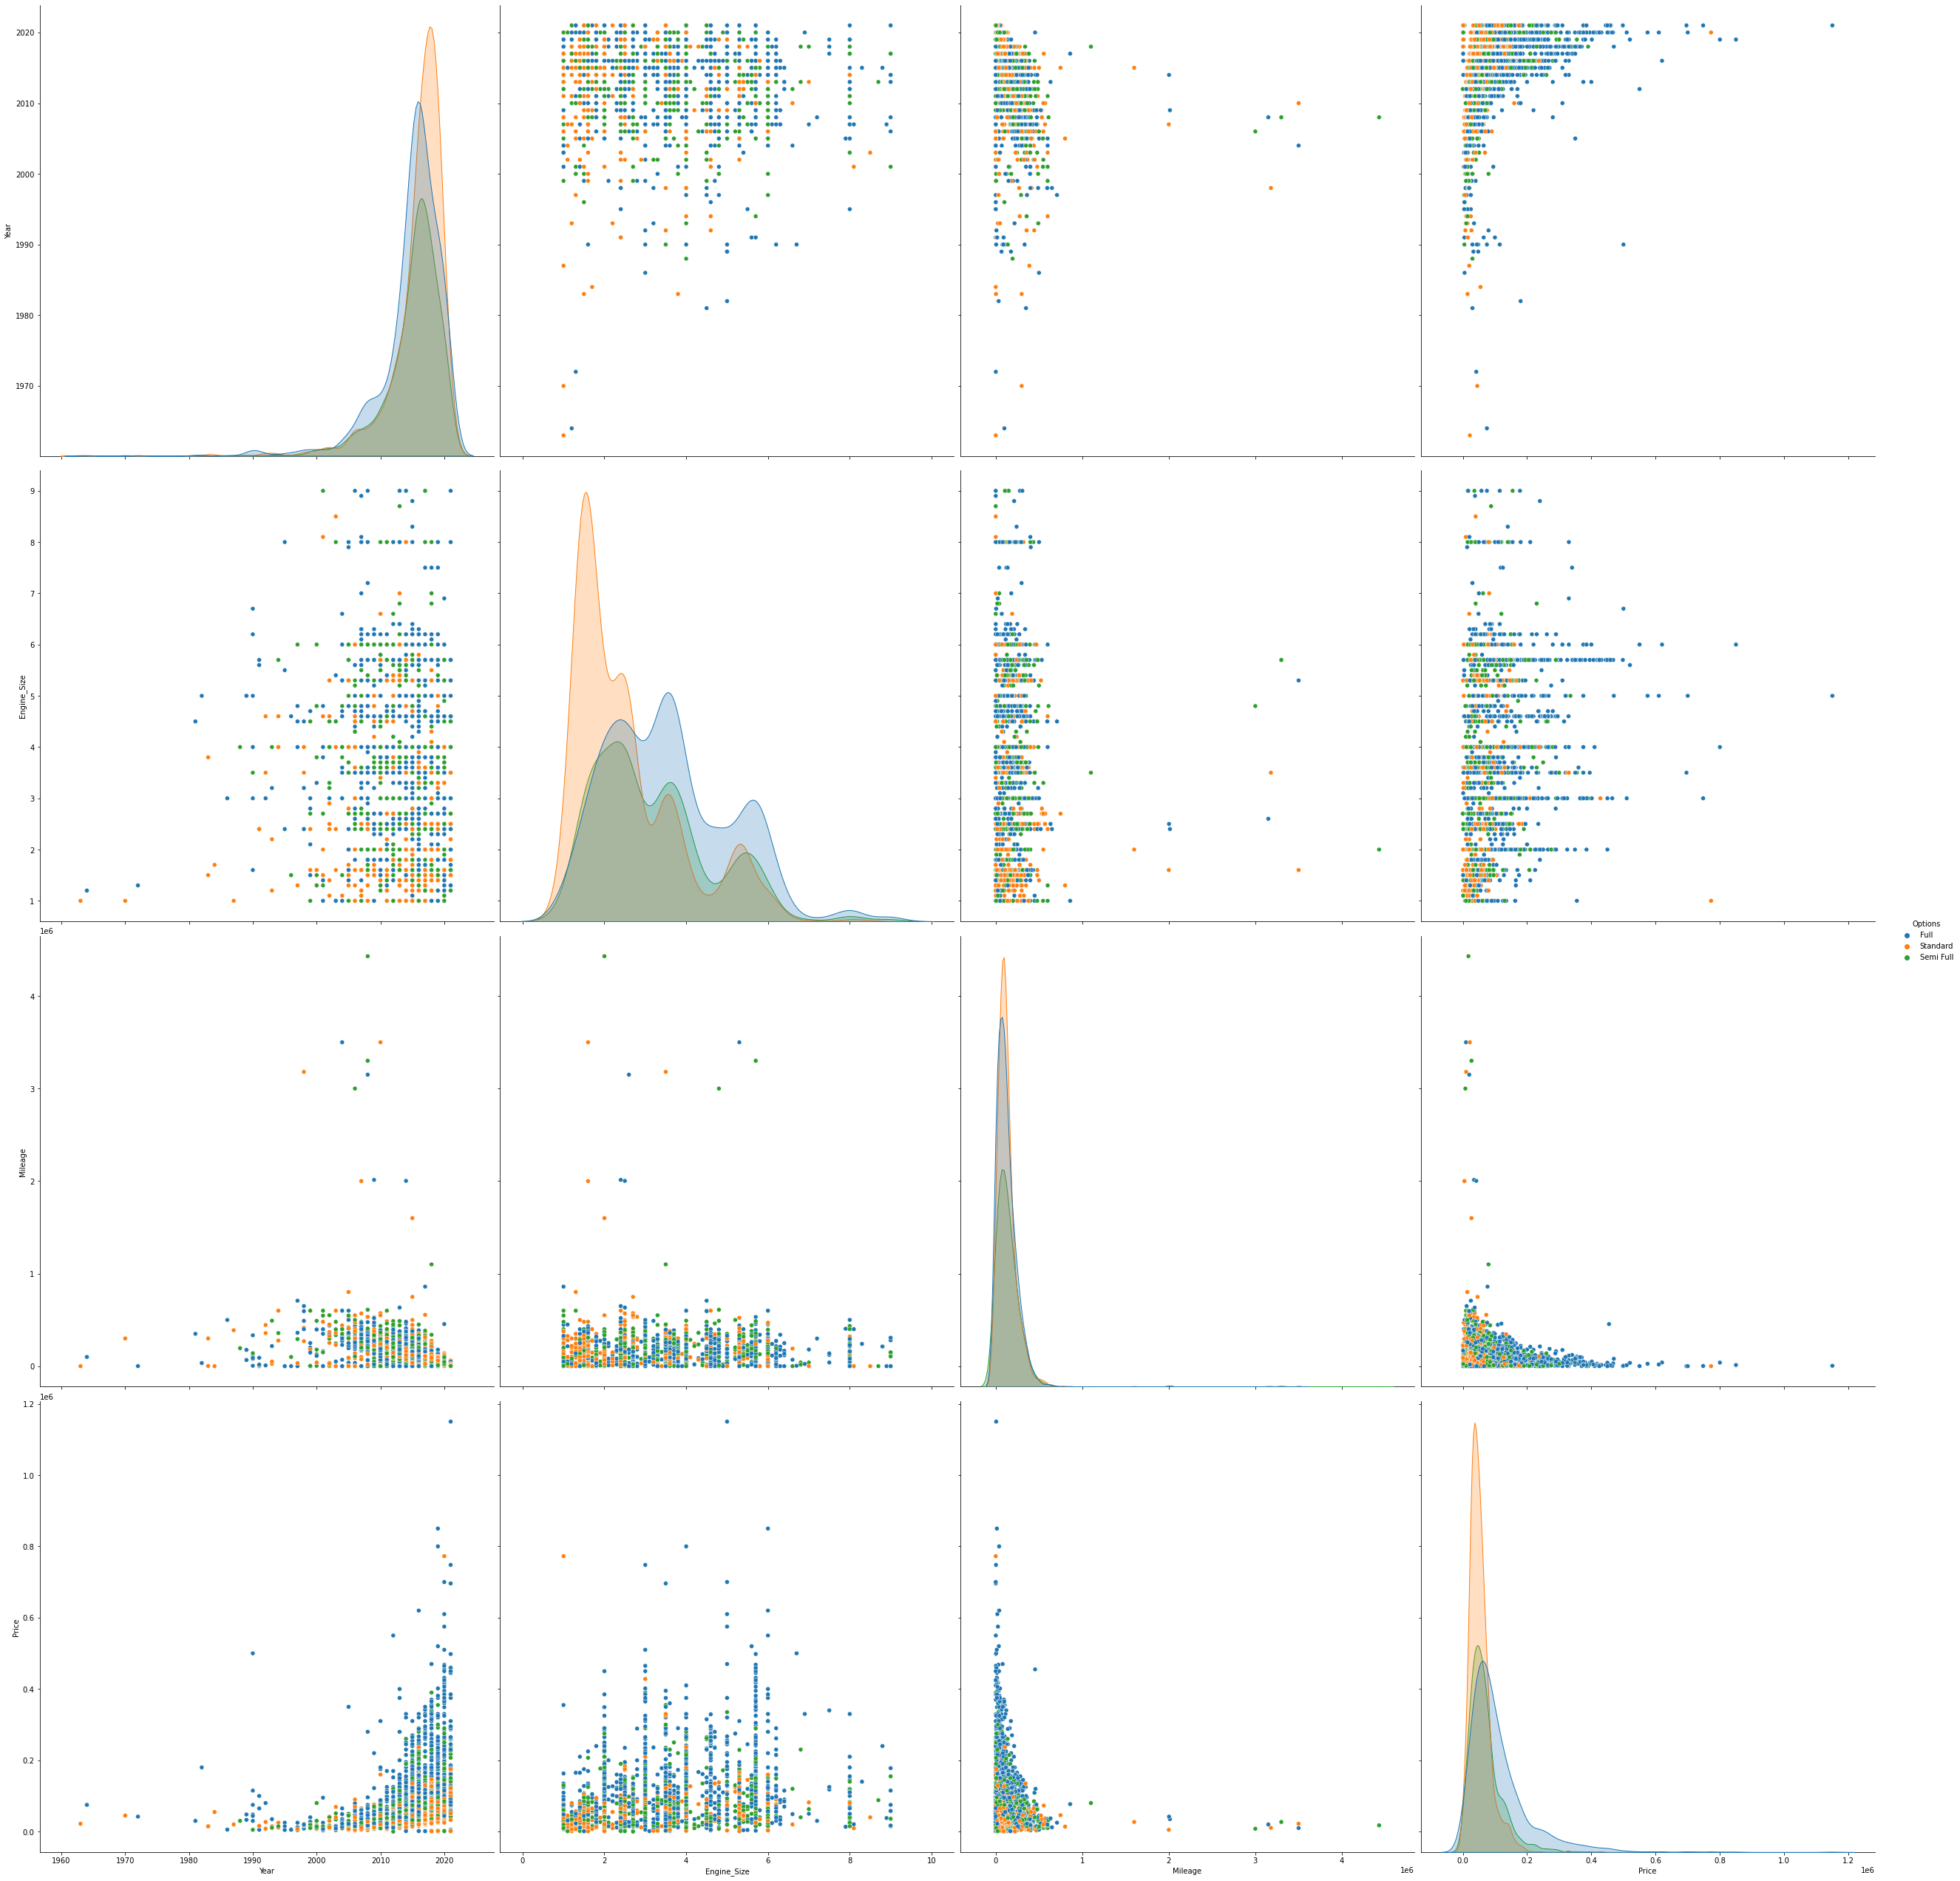

In [18]:
sns.pairplot(df,hue='Options', height=9);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         4423 non-null   object 
 1   Type         4423 non-null   object 
 2   Year         4423 non-null   int64  
 3   Origin       4423 non-null   object 
 4   Color        4423 non-null   object 
 5   Options      4423 non-null   object 
 6   Engine_Size  4423 non-null   float64
 7   Fuel_Type    4423 non-null   object 
 8   Gear_Type    4423 non-null   object 
 9   Mileage      4423 non-null   int64  
 10  Region       4423 non-null   object 
 11  Price        4423 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 449.2+ KB


In [20]:
df['Make'].unique()

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'Chevrolet',
       'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'GMC', 'Mazda', 'Ford',
       'Kia', 'Genesis', 'Cadillac', 'MG', 'Jeep', 'INFINITI', 'Dodge',
       'Ferrari', 'Great Wall', 'Jaguar', 'GAC', 'Renault', 'Suzuki',
       'Peugeot', 'Changan', 'Geely', 'HAVAL', 'BMW', 'Rolls-Royce',
       'Porsche', 'Mitsubishi', 'Subaru', 'Zhengzhou', 'Lincoln', 'FAW',
       'Chery', 'Isuzu', 'Audi', 'Bentley', 'Aston Martin', 'Daihatsu',
       'Volkswagen', 'Fiat', 'Mercury', 'Classic', 'Hummer', 'BYD',
       'Maserati', 'Other', 'Lifan', 'Foton', 'Victory Auto', 'Škoda',
       'Iveco'], dtype=object)

In [21]:
df['Year'].unique()

array([2018, 2019, 2011, 2017, 2014, 2016, 2021, 2020, 2015, 2013, 2008,
       2009, 2012, 2010, 2006, 2007, 1992, 2005, 1984, 2000, 2002, 2004,
       1998, 1982, 1994, 2001, 1997, 1999, 1990, 1995, 1989, 1993, 1988,
       1987, 2003, 1964, 1963, 1991, 1981, 1996, 1983, 1972, 1970, 1986])

In [22]:
df['Type'].unique()

array(['C300', 'Sunny', 'Elantra', 'Accord', 'Land Cruiser', 'Impala',
       'Yaris', 'Camry', 'Patrol', 'Tahoe', 'E', 'Accent', 'Corolla',
       'Copper', 'Prado', 'Civic', 'Furniture', 'RX', 'Range Rover',
       'Yukon', 'Bus Urvan', 'Aurion', 'Malibu', 'Rav4', 'CX9',
       'Expedition', 'ES', 'Cadenza', 'Tucson', 'Platinum', 'G80',
       'Sonata', 'LX', 'GX', 'Azera', 'CT-S', 'ZS', 'Kona',
       'Grand Cherokee', 'S', 'M', 'Charger', 'Taurus', 'GTB 599 Fiorano',
       'Royal', 'Picanto', 'Power', 'F-Pace', 'Hilux', 'FJ', 'Senta fe',
       'Optima', 'GS8', 'Maxima', 'Caprice', 'Challenger', 'Datsun',
       'Camaro', 'Symbol', 'Fluence', '6', 'RX5', 'Avalon', 'APV', '3008',
       'Cerato', 'Traverse', 'F150', 'Genesis', 'NX', 'C', 'G70', 'Flex',
       'UX', 'Cores', 'Creta', 'Rio', 'Odyssey', 'Sylvian Bus', 'Ciocca',
       'Land Cruiser Pickup', 'Duster', 'Seven', 'EC8', 'H6', '300',
       'The 7', 'Explorer', 'Spark', 'Z370', 'Victoria', 'Ghost', '911',
       'Carnival'

In [23]:
len(df['Type'].unique())

351

In [24]:
df['Region'].unique()

array(['Riyadh', 'Jeddah', 'Dammam', 'Al-Medina', 'Qassim', 'Makkah',
       'Jazan', 'Aseer', 'Al-Ahsa', 'Taef', 'Sabya', 'Khobar', 'Al-Baha',
       'Tabouk', 'Yanbu', 'Hail', 'Jubail', 'Abha', 'Hafar Al-Batin',
       'Najran', 'Arar', 'Al-Namas', 'Al-Jouf', 'Qurayyat', 'Sakaka',
       'Wadi Dawasir', 'Besha'], dtype=object)

In [25]:
df[df['Make']=='Other']

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
3078,Other,Other,2019,Other,White,Full,8.0,Diesel,Manual,24643,Qassim,330000.0
5115,Other,Other,2007,Saudi,Red,Standard,3.5,Gas,Manual,125,Qassim,7000.0
5530,Other,Other,2019,Saudi,Brown,Full,1.0,Gas,Manual,4000,Jeddah,39000.0
5715,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500.0
6866,Other,Other,2020,Other,Black,Standard,1.1,Gas,Manual,2848,Al-Baha,2000.0
7812,Other,Other,2011,Other,Black,Full,1.8,Gas,Manual,33000,Al-Medina,50000.0


In [26]:
df[df['Type']=='Other']

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
1157,Ford,Other,1982,Other,Bronze,Full,5.0,Gas,Automatic,34000,Dammam,180000.0
1280,Mitsubishi,Other,2006,Saudi,White,Standard,2.5,Diesel,Manual,140000,Al-Medina,45000.0
1497,Honda,Other,2009,Saudi,Orange,Full,1.0,Gas,Manual,32743,Jeddah,27500.0
2898,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500.0
3078,Other,Other,2019,Other,White,Full,8.0,Diesel,Manual,24643,Qassim,330000.0
3209,Ford,Other,2013,Gulf Arabic,Blue,Semi Full,3.0,Gas,Automatic,318000,Riyadh,40000.0
3989,Geely,Other,2017,Saudi,Blue,Full,1.4,Gas,Automatic,45000,Riyadh,36000.0
4007,Hyundai,Other,2012,Saudi,Black,Full,2.4,Gas,Automatic,3330,Aseer,25000.0
4237,Ford,Other,2016,Saudi,Another Color,Full,3.2,Gas,Automatic,15500,Riyadh,90000.0
4238,Ford,Other,1963,Saudi,Blue,Standard,1.0,Gas,Manual,300,Riyadh,22000.0


In [27]:
#drop any record with Make = 'Other' OR Type = 'Other'
df = df.drop(df[df['Make']=='Other'].index)
df = df.drop(df[df['Type']=='Other'].index)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8239,Mitsubishi,Lancer,2009,Other,Grey,Standard,1.6,Gas,Automatic,222835,Riyadh,11500.0
8240,Ford,Edge,2013,Saudi,Black,Standard,6.0,Gas,Automatic,277000,Najran,30000.0
8241,Kia,Cadenza,2012,Saudi,Black,Standard,3.6,Gas,Automatic,147000,Riyadh,25000.0
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0


In [28]:
df['Make_Type'] = df['Make']+'_'+df['Type'] 
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Make_Type
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,Chrysler_C300
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,Nissan_Sunny
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,Hyundai_Elantra
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,Hyundai_Elantra
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0,Honda_Accord
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8239,Mitsubishi,Lancer,2009,Other,Grey,Standard,1.6,Gas,Automatic,222835,Riyadh,11500.0,Mitsubishi_Lancer
8240,Ford,Edge,2013,Saudi,Black,Standard,6.0,Gas,Automatic,277000,Najran,30000.0,Ford_Edge
8241,Kia,Cadenza,2012,Saudi,Black,Standard,3.6,Gas,Automatic,147000,Riyadh,25000.0,Kia_Cadenza
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0,Kia_Sorento


In [29]:
df.groupby(['Make','Type','Year']).nunique()

Origin  Color  Options  Engine_Size  Fuel_Type  \
Make         Type     Year                                                   
Aston Martin DB9      2010       1      1        1            1          1   
             Vanquish 2013       1      1        1            1          1   
             Vantage  2012       1      1        1            1          1   
Audi         A3       2016       1      1        1            2          1   
             A4       2009       1      1        1            1          1   
...                            ...    ...      ...          ...        ...   
Volkswagen   Tiguan   2019       1      1        1            1          1   
             Touareg  2015       1      1        1            1          1   
Zhengzhou    Pick up  2020       1      1        1            1          1   
Škoda        Fabia    2007       1      1        1            1          1   
             Superb   2008       1      1        1            1          1   

                            Gear_Type  Mileage  Region  Price  Make_Type  
Make         Type     Year                                                
Aston Martin DB9      2010          1        1       1      1          1  
             Vanquish 2013          1        1       1      1          1  
             Vantage  2012          1        1       1      1          1  
Audi         A3       2016          1        2       1      2          1  
             A4       2009          1        1       1      1          1  
...                               ...      ...     ...    ...        ...  
Volkswagen   Tiguan   2019          1        1       1      1          1  
             Touareg  2015          1        1       1      1          1  
Zhengzhou    Pick up  2020          1        1       1      1          1  
Škoda        Fabia    2007          1        1       1      1          1  
             Superb   2008          1        1       1      1          1  

[1413 rows x 10 columns]

In [30]:
df.groupby(['Region']).nunique()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price,Make_Type
Region,,,,,,,,,,,,
Abha,12,21,14,2,11,3,17,2,2,23,21,21
Al-Ahsa,25,62,22,3,13,3,31,2,2,90,73,62
Al-Baha,8,13,11,3,6,3,15,1,2,16,14,13
Al-Jouf,7,11,10,3,5,3,11,2,2,12,10,11
Al-Medina,21,65,23,3,13,3,34,2,2,102,67,66
Al-Namas,7,7,5,1,4,2,6,1,2,7,7,7
Arar,6,10,6,2,6,3,10,1,2,10,11,10
Aseer,20,56,21,3,11,3,32,2,2,79,65,56
Besha,2,2,2,1,2,1,2,1,1,2,2,2


In [31]:
df.groupby(['Make']).nunique()

,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Make_Type
Make,,,,,,,,,,,,
Aston Martin,3,3,1,3,1,1,1,2,3,1,3,3
Audi,10,10,3,8,3,10,1,1,28,5,29,10
BMW,8,17,3,12,3,18,2,1,60,8,54,8
BYD,1,1,1,1,1,1,1,1,1,1,1,1
Bentley,3,7,1,4,2,3,1,1,7,3,7,3
Cadillac,9,16,3,8,3,14,1,1,21,7,22,9
Changan,7,3,2,8,3,5,1,1,32,6,20,7
Chery,2,2,1,2,2,2,1,2,2,2,2,2
Chevrolet,19,24,3,14,3,37,2,2,234,18,145,19


In [32]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Make_Type
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,Chrysler_C300
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,Nissan_Sunny
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,Hyundai_Elantra
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,Hyundai_Elantra
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0,Honda_Accord
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8239,Mitsubishi,Lancer,2009,Other,Grey,Standard,1.6,Gas,Automatic,222835,Riyadh,11500.0,Mitsubishi_Lancer
8240,Ford,Edge,2013,Saudi,Black,Standard,6.0,Gas,Automatic,277000,Najran,30000.0,Ford_Edge
8241,Kia,Cadenza,2012,Saudi,Black,Standard,3.6,Gas,Automatic,147000,Riyadh,25000.0,Kia_Cadenza
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0,Kia_Sorento


refrences:
https://www.kaggle.com/questions-and-answers/181332

Al Jawf Province	Al-Jouf
Al Jawf Province	Qurayyat
Al Jawf Province	Sakaka
Al-Bahah Province	Al-Baha
Al-Qassim Province	Qassim
Asir Province	Abha
Asir Province	Al-Namas
Asir Province	Aseer
Asir Province	Besha
Eastern Province	Al-Ahsa
Eastern Province	Dammam
Eastern Province	Hafar Al-Batin
Eastern Province	Jubail
Eastern Province	Khobar
Hail Province	Hail
Jazan Province	Jazan
Jazan Province	Sabya
Madinah Province	Al-Medina
Madinah Province	Yanbu
Makkah Province	Jeddah
Makkah Province	Makkah
Makkah Province	Taef
Najran Province	Najran
Northern Borders Province	Arar
Riyadh Province	Riyadh
Riyadh Province	Wadi Dawasir
Tabuk Province	Tabouk

In [33]:
df.shape

(4404, 13)

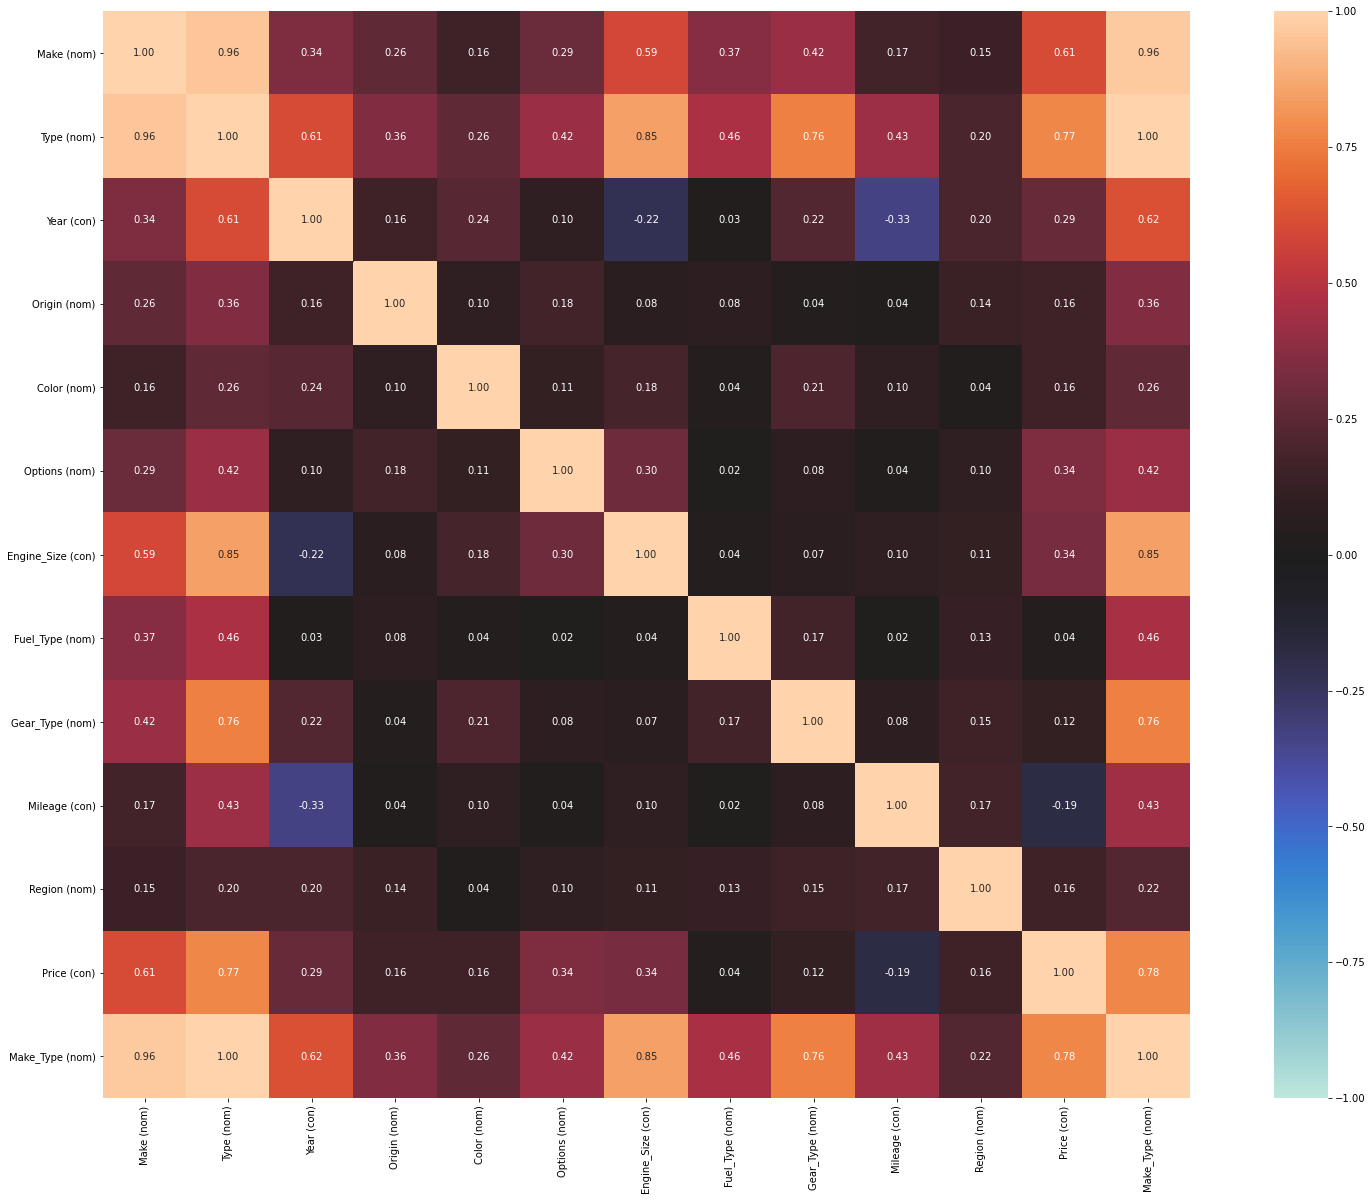

In [34]:
nominal.associations(df,figsize=(30,20),mark_columns=True);